<a href="https://colab.research.google.com/github/ed-chin-git/DS-Project-1---Data-Storytelling/blob/master/DS1_Project1_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Project 1



#Question:  

---


##What is the  availability of clean water and arable land in the Middle East?


---

###The conflict in the Middle East that began decades ago continues to this day. During this long period has the availability of clean water and arable land been affected? Let's take a closer look at the situation..

##Data is available thru the following sources:
#####(Arable land is land cultivated for crops that are replanted after each harvest like wheat, maize, and rice.)
![alt text](http://www.fao.org/nr/water/aquastat/data/images/FAO_logo_Blue_3lines_en.jpg)

Get data [here](http://www.fao.org/nr/water/aquastat/data/query/index.html?lang=en) 

##Compose and analize United Nations Data


###  Import Libs

In [0]:
!pip install --upgrade seaborn

!apt-get -qq install python-cartopy python3-cartopy

#restart runtime:
import os
os.kill(os.getpid(), 9)

    100% |████████████████████████████████| 215kB 23.9MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1
Selecting previously unselected package python-pkg-resources.
(Reading database ... 110377 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D 

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import seaborn as sns
print('Seaborn version',sns.__version__, 'installed')

Seaborn version 0.9.0 installed


### Load csv's

In [0]:
data_url='https://raw.githubusercontent.com/ed-chin-git/DS-Project-1---Data-Storytelling/master/cultivated.csv'
df_cultivated=pd.read_csv(data_url)

data_url='https://raw.githubusercontent.com/ed-chin-git/DS-Project-1---Data-Storytelling/master/GDP.csv'
df_GDP=pd.read_csv(data_url)

data_url='https://raw.githubusercontent.com/ed-chin-git/DS-Project-1---Data-Storytelling/master/water.csv'
df_water=pd.read_csv(data_url)


In [4]:
print(df_cultivated.head())
df_cultivated.describe()

       Country  Year  Pct_cultivated
0  Afghanistan  1997           11.93
1  Afghanistan  2002           11.88
2  Afghanistan  2007           12.12
3  Afghanistan  2012           12.12
4  Afghanistan  2015           12.12


Year  Pct_cultivated
count    75.000000       75.000000
mean   2006.600000       10.593729
std       6.573904       10.705491
min    1997.000000        0.210000
25%    2002.000000        1.762500
50%    2007.000000        5.974000
75%    2012.000000       17.385000
max    2015.000000       36.540000

In [5]:
print(df_GDP.head())
df_GDP.describe()

       Country  Year  GDP_percapita
0  Afghanistan  1997            NaN
1  Afghanistan  2002          192.2
2  Afghanistan  2007          380.4
3  Afghanistan  2012          690.8
4  Afghanistan  2015          590.3


Year  GDP_percapita
count    75.000000      72.000000
mean   2006.600000   13094.661111
std       6.573904   18032.468986
min    1997.000000     192.200000
25%    2002.000000    1562.000000
50%    2007.000000    5404.000000
75%    2012.000000   19649.750000
max    2015.000000   94246.000000

In [6]:
print(df_water.head())
df_water.describe()

       Country  Year  Water_access
0  Afghanistan  1997          25.0
1  Afghanistan  2002          33.8
2  Afghanistan  2007          42.6
3  Afghanistan  2012          51.6
4  Afghanistan  2015          55.3


Year  Water_access
count    75.000000     75.000000
mean   2006.600000     87.482667
std       6.573904     17.421603
min    1997.000000     25.000000
25%    2002.000000     85.800000
50%    2007.000000     95.700000
75%    2012.000000     99.000000
max    2015.000000    100.000000

### Combine DataFrames

In [7]:
df2=pd.merge(df_water,df_cultivated,how='left', on=['Country','Year'])
df=pd.merge(df2,df_GDP,how='left', on=['Country','Year'])
df

Country  Year  Water_access  Pct_cultivated  \
0                      Afghanistan  1997          25.0         11.9300   
1                      Afghanistan  2002          33.8         11.8800   
2                      Afghanistan  2007          42.6         12.1200   
3                      Afghanistan  2012          51.6         12.1200   
4                      Afghanistan  2015          55.3         12.1200   
5                          Bahrain  1997          97.1          7.0420   
6                          Bahrain  2002         100.0          7.3240   
7                          Bahrain  2007         100.0          5.8670   
8                          Bahrain  2012         100.0          5.9740   
9                          Bahrain  2015         100.0          5.9660   
10                           Egypt  1997          95.1          3.2400   
11                           Egypt  2002          96.4          3.4190   
12                           Egypt  2007          97.6          3.5330   
13                           Egypt  2012          98.8          3.6910   
14                           Egypt  2015          99.4          3.7400   
15      Iran (Islamic Republic of)  1997          93.5         10.2200   
16      Iran (Islamic Republic of)  2002          94.5          9.9960   
17      Iran (Islamic Republic of)  2007          95.4         10.6300   
18      Iran (Islamic Republic of)  2012          96.0          9.6090   
19      Iran (Islamic Republic of)  2015          96.2          9.4410   
20                            Iraq  1997          78.9         10.6300   
21                            Iraq  2002          81.3         11.0400   
22                            Iraq  2007          83.7         11.7300   
23                            Iraq  2012          86.1         10.5000   
24                            Iraq  2015          86.6         12.1100   
25                          Israel  1997         100.0         18.9900   
26                          Israel  2002         100.0         19.6200   
27                          Israel  2007         100.0         17.2700   
28                          Israel  2012         100.0         17.5000   
29                          Israel  2015         100.0         18.0200   
..                             ...   ...           ...             ...   
45  Occupied Palestinian Territory  1997          96.0         36.5400   
46  Occupied Palestinian Territory  2002          86.7         36.5400   
47  Occupied Palestinian Territory  2007          76.0         33.8000   
48  Occupied Palestinian Territory  2012          65.1         20.2700   
49  Occupied Palestinian Territory  2015          58.4         24.5800   
50                            Oman  1997          81.8          0.2262   
51                            Oman  2002          85.5          0.2372   
52                            Oman  2007          89.4          0.2100   
53                            Oman  2012          93.3          0.2352   
54                            Oman  2015          93.4          0.2223   
55                           Qatar  1997          98.8          1.3780   
56                           Qatar  2002          99.4          1.2490   
57                           Qatar  2007          99.9          1.3440   
58                           Qatar  2012         100.0          1.3370   
59                           Qatar  2015         100.0          1.3440   
60                    Saudi Arabia  1997          94.0          1.7610   
61                    Saudi Arabia  2002          95.7          1.7640   
62                    Saudi Arabia  2007          97.0          1.7100   
63                    Saudi Arabia  2012          97.0          1.5560   
64                    Saudi Arabia  2015          97.0          1.6970   
65            Syrian Arab Republic  1997          86.7         29.8100   
66            Syrian Arab Republic  2002          88.0         29.2700   
67            Syrian Arab Repub

## View Preliminary Statistics

In [8]:
df.describe()

Year  Water_access  Pct_cultivated  GDP_percapita
count    75.000000     75.000000       75.000000      72.000000
mean   2006.600000     87.482667       10.593729   13094.661111
std       6.573904     17.421603       10.705491   18032.468986
min    1997.000000     25.000000        0.210000     192.200000
25%    2002.000000     85.800000        1.762500    1562.000000
50%    2007.000000     95.700000        5.974000    5404.000000
75%    2012.000000     99.000000       17.385000   19649.750000
max    2015.000000    100.000000       36.540000   94246.000000

In [9]:
df.pivot_table(values='Water_access',columns=['Year'], index=['Country'] )

Year                             1997   2002   2007   2012   2015
Country                                                          
Afghanistan                      25.0   33.8   42.6   51.6   55.3
Bahrain                          97.1  100.0  100.0  100.0  100.0
Egypt                            95.1   96.4   97.6   98.8   99.4
Iran (Islamic Republic of)       93.5   94.5   95.4   96.0   96.2
Iraq                             78.9   81.3   83.7   86.1   86.6
Israel                          100.0  100.0  100.0  100.0  100.0
Jordan                           96.7   96.8   96.9   96.9   96.9
Kuwait                           99.0   99.0   99.0   99.0   99.0
Lebanon                          83.3   88.1   94.1   99.0   99.0
Occupied Palestinian Territory   96.0   86.7   76.0   65.1   58.4
Oman                             81.8   85.5   89.4   93.3   93.4
Qatar                            98.8   99.4   99.9  100.0  100.0
Saudi Arabia                     94.0   95.7   97.0   97.0   97.0
Syrian Arab Republic             86.7   88.0   89.1   90.1   90.1
Yemen                            61.9   58.5   55.0   54.9   54.9

In [10]:
df.pivot_table(values='GDP_percapita',columns=['Year'], index=['Country'] )

Year                               1997     2002     2007     2012     2015
Country                                                                    
Afghanistan                         NaN    192.2    380.4    690.8    590.3
Bahrain                         10621.0  13278.0  21159.0  23056.0  23400.0
Egypt                            1211.0   1239.0   1675.0   3222.0   3617.0
Iran (Islamic Republic of)       1826.0   1906.0   4699.0   7708.0   5372.0
Iraq                              470.0    760.5   3126.0   6614.0   4640.0
Israel                          20426.0  19391.0  26008.0  33788.0  36706.0
Jordan                           1594.0   1940.0   2971.0   4423.0   4940.0
Kuwait                          18004.0  18677.0  45293.0  50877.0  29034.0
Lebanon                          5093.0   5436.0   6016.0   8774.0   8050.0
Occupied Palestinian Territory   1309.0   1052.0   1466.0   2624.0   2716.0
Oman                             7108.0   8671.0  16224.0  21535.0  15643.0
Qatar                           21389.0  30523.0  67610.0  94246.0  74720.0
Saudi Arabia                     8329.0   8338.0  15948.0  24885.0  20482.0
Syrian Arab Republic              957.3   1270.0   2080.0      NaN      NaN
Yemen                             418.3    567.8   1181.0   1289.0   1340.0

In [11]:
df.pivot_table(values='Pct_cultivated',columns=['Year'], index=['Country'] )

Year                               1997     2002     2007     2012     2015
Country                                                                    
Afghanistan                     11.9300  11.8800  12.1200  12.1200  12.1200
Bahrain                          7.0420   7.3240   5.8670   5.9740   5.9660
Egypt                            3.2400   3.4190   3.5330   3.6910   3.7400
Iran (Islamic Republic of)      10.2200   9.9960  10.6300   9.6090   9.4410
Iraq                            10.6300  11.0400  11.7300  10.5000  12.1100
Israel                          18.9900  19.6200  17.2700  17.5000  18.0200
Jordan                           3.0410   3.1880   2.4930   3.3910   3.6050
Kuwait                           0.3928   0.8418   0.8418   0.8979   0.9035
Lebanon                         30.8100  25.9300  26.5200  24.6900  24.6900
Occupied Palestinian Territory  36.5400  36.5400  33.8000  20.2700  24.5800
Oman                             0.2262   0.2372   0.2100   0.2352   0.2223
Qatar                            1.3780   1.2490   1.3440   1.3370   1.3440
Saudi Arabia                     1.7610   1.7640   1.7100   1.5560   1.6970
Syrian Arab Republic            29.8100  29.2700  30.6900  30.9500  30.9600
Yemen                            3.2580   3.1370   3.0820   2.9360   2.9280

#### Eliminate high GDP countries 

In [37]:
high_GDP=['Qatar']

df_high=df[df.Country.isin(high_GDP)]
df_low=df[df.Country.isin(high_GDP)!=True]
print(df_high.Country.nunique())
print(df_low.Country.nunique())

df=df[df.Country.isin(high_GDP)!=True]



1
14


## Preliminary Plots

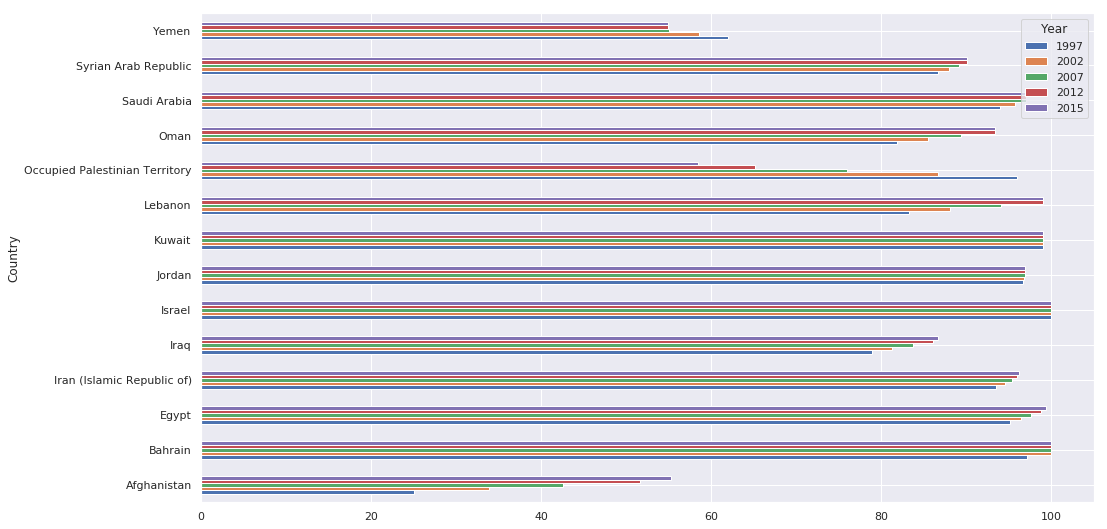

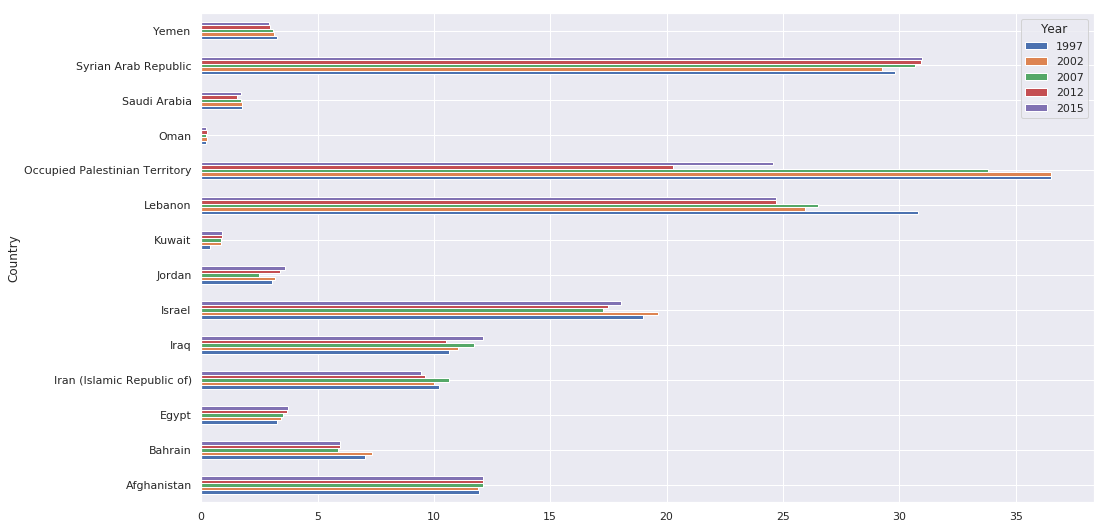

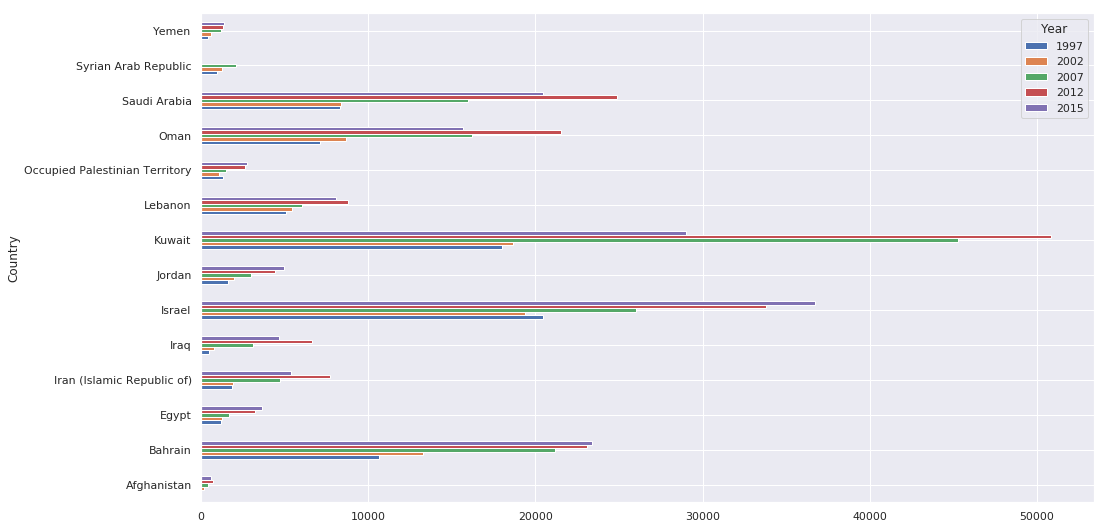

In [38]:
p_table = df.pivot_table(values='Water_access',columns=['Year'], index=['Country'] )
p_table.plot(kind='barh',figsize=(16, 9))

p_table = df.pivot_table(values='Pct_cultivated',columns=['Year'], index=['Country'] )
p_table.plot(kind='barh',figsize=(16, 9))

p_table = df.pivot_table(values='GDP_percapita',columns=['Year'], index=['Country'] )
p_table.plot(kind='barh',figsize=(16, 9))



##  Final Visualizations


In [0]:
sns.set()  # use Seaborn styles
sns.set(style="darkgrid")

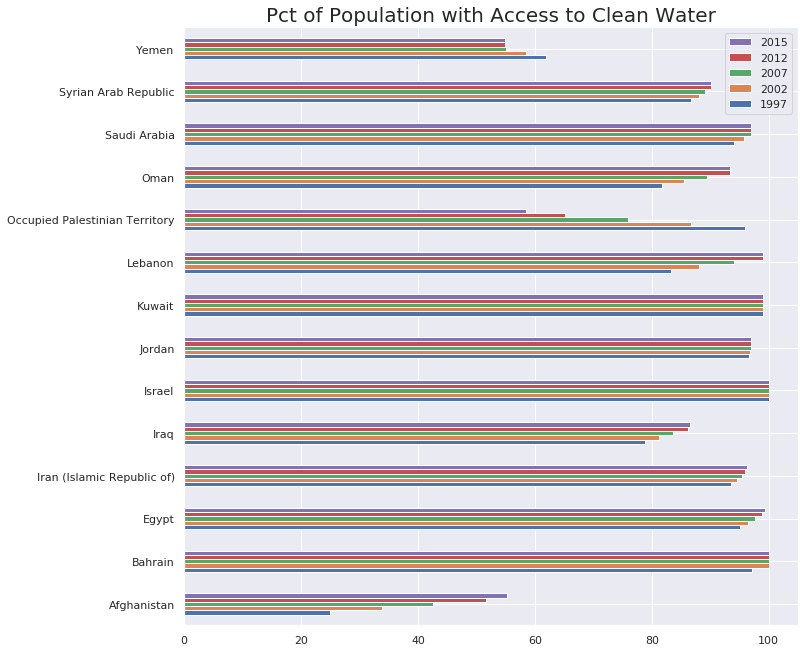

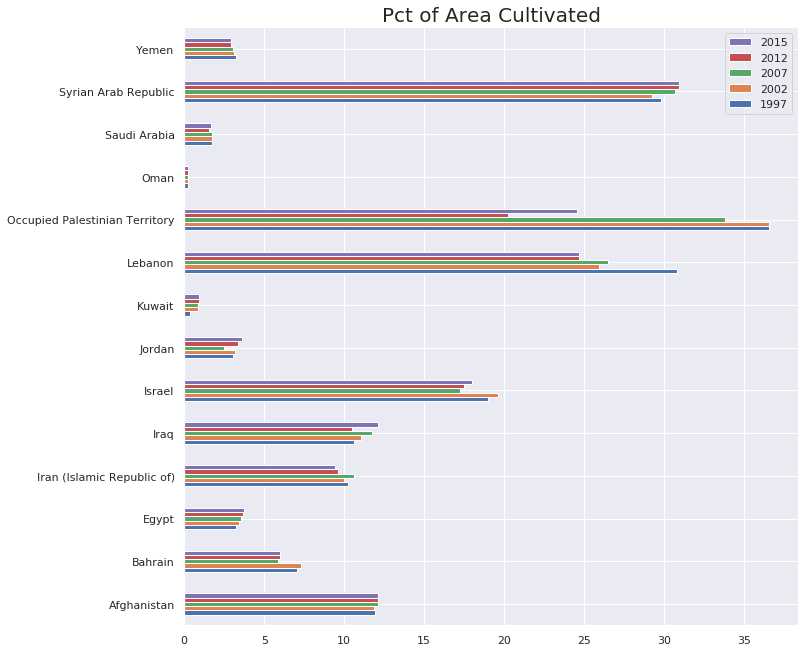

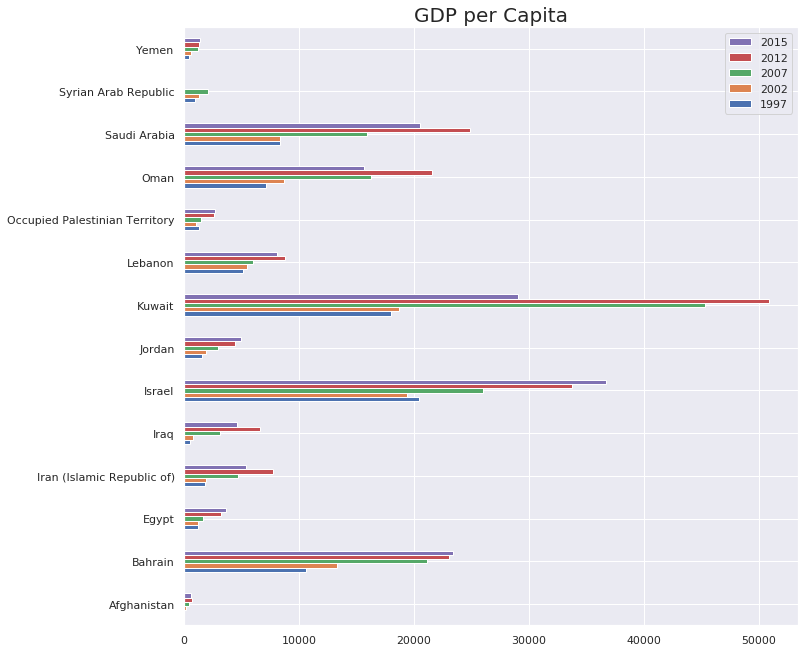

In [106]:
p_table=df.pivot_table('Water_access', index='Country', columns='Year');
ax=p_table.plot(kind='barh',figsize=(11,11));
plt.title('Pct of Population with Access to Clean Water',fontsize=20);
plt.ylabel('');
#  resort the legend items ______________________
handles, labels = ax.get_legend_handles_labels()
new_h=[]
new_l=[]
for x in range(4,-1,-1):
  new_h.append(handles[x])
  new_l.append(labels[x])
ax.legend(new_h,new_l);
#________________________________________________

p_table=df.pivot_table('Pct_cultivated', index='Country', columns='Year');
ax=p_table.plot(kind='barh',figsize=(11,11));
plt.title('Pct of Area Cultivated',fontsize=20);
plt.ylabel('');
#  resort the legend items ______________________
handles, labels = ax.get_legend_handles_labels()
new_h=[]
new_l=[]
for x in range(4,-1,-1):
  new_h.append(handles[x])
  new_l.append(labels[x])
ax.legend(new_h,new_l);
#________________________________________________

p_table=df.pivot_table('GDP_percapita', index='Country', columns='Year');
ax=p_table.plot(kind='barh',figsize=(11,11));
plt.title('GDP per Capita',fontsize=20);
handles, labels = ax.get_legend_handles_labels()
plt.ylabel('');
#  resort the legend items ______________________
handles, labels = ax.get_legend_handles_labels()
new_h=[]
new_l=[]
for x in range(4,-1,-1):
  new_h.append(handles[x])
  new_l.append(labels[x])
ax.legend(new_h,new_l);
#________________________________________________



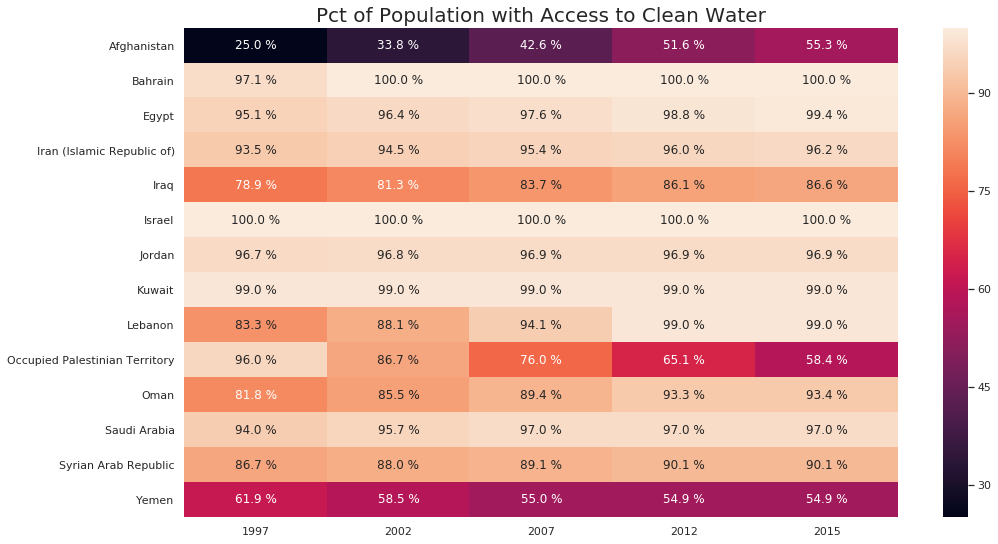

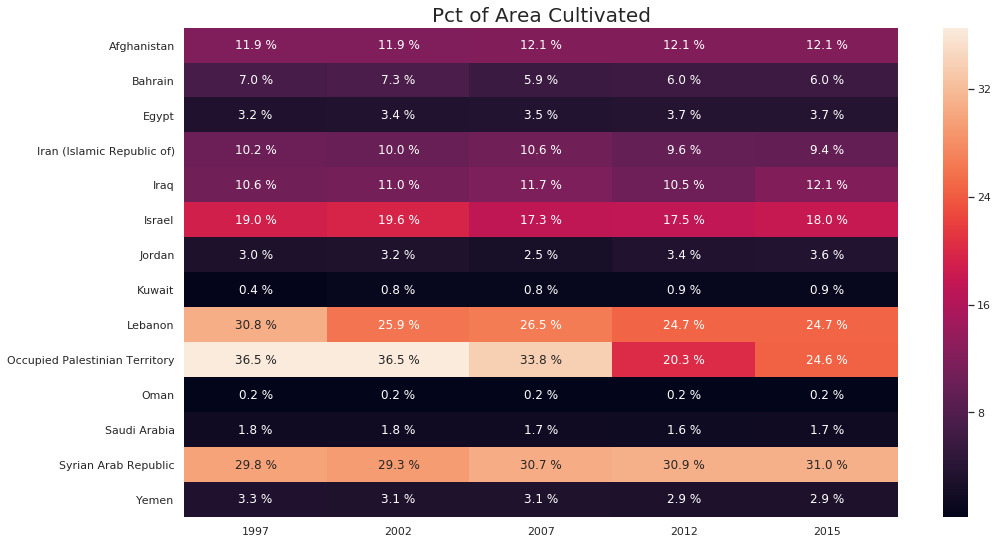

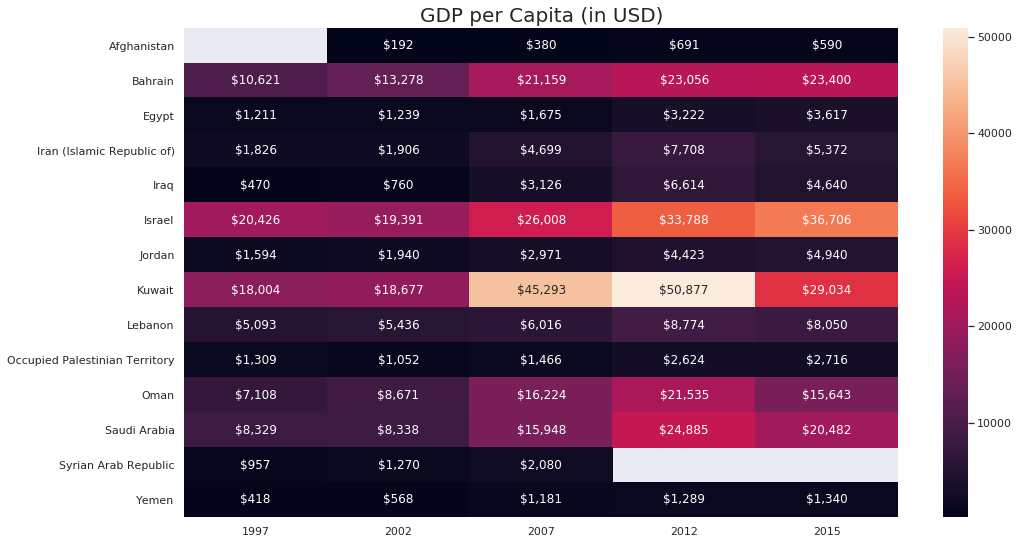

In [108]:
p_table=df.pivot_table('Water_access', index='Country', columns='Year');
plt.figure(figsize=(16, 9))  # change the size of the graph
ax = sns.heatmap(p_table, annot=True, fmt='.1f' )
ax.set_title('Pct of Population with Access to Clean Water', fontsize=20)
for t in ax.texts: t.set_text(t.get_text() + " %"); 
plt.ylabel('');
plt.xlabel('');

p_table=df.pivot_table('Pct_cultivated', index='Country', columns='Year')
plt.figure(figsize=(16, 9))  # change the size of the graph
ax = sns.heatmap(p_table, annot=True, fmt='.1f' )
ax.set_title('Pct of Area Cultivated', fontsize=20)
for t in ax.texts: t.set_text(t.get_text() + " %"); 
plt.ylabel('');
plt.xlabel('');

p_table=df.pivot_table('GDP_percapita', index='Country', columns='Year')
plt.figure(figsize=(16, 9))  # change the size of the graph
ax = sns.heatmap(p_table, annot=True, fmt=',.0f' )
ax.set_title('GDP per Capita (in USD)', fontsize=20);
for t in ax.texts: t.set_text( "$"+t.get_text()); 
plt.ylabel('');
plt.xlabel('');


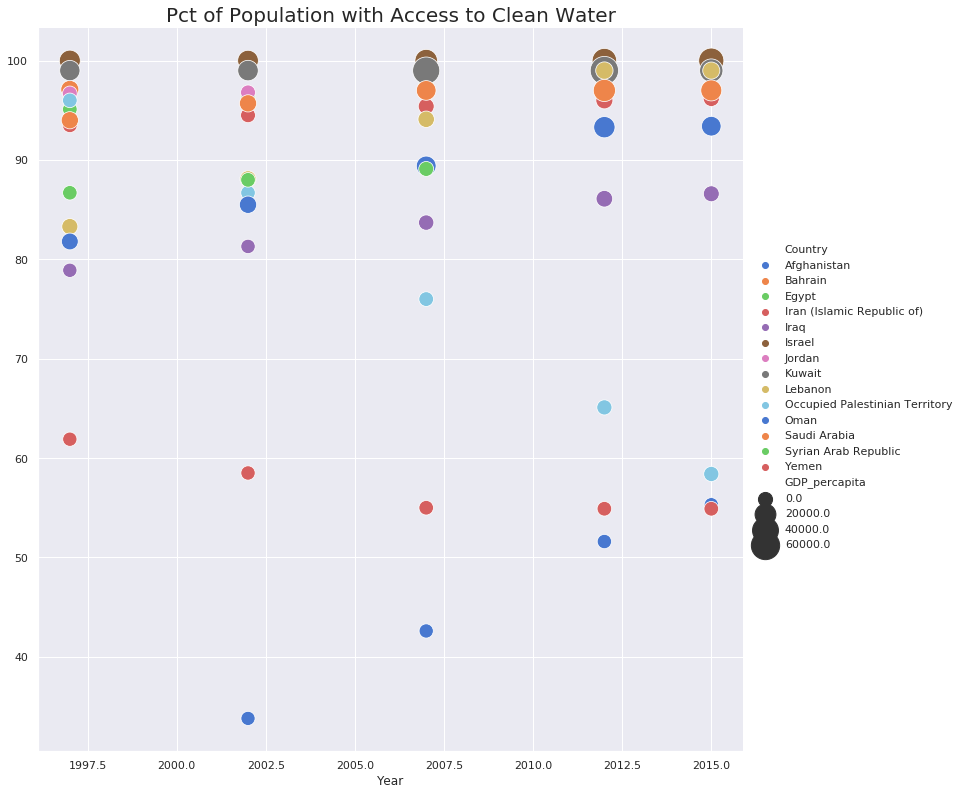

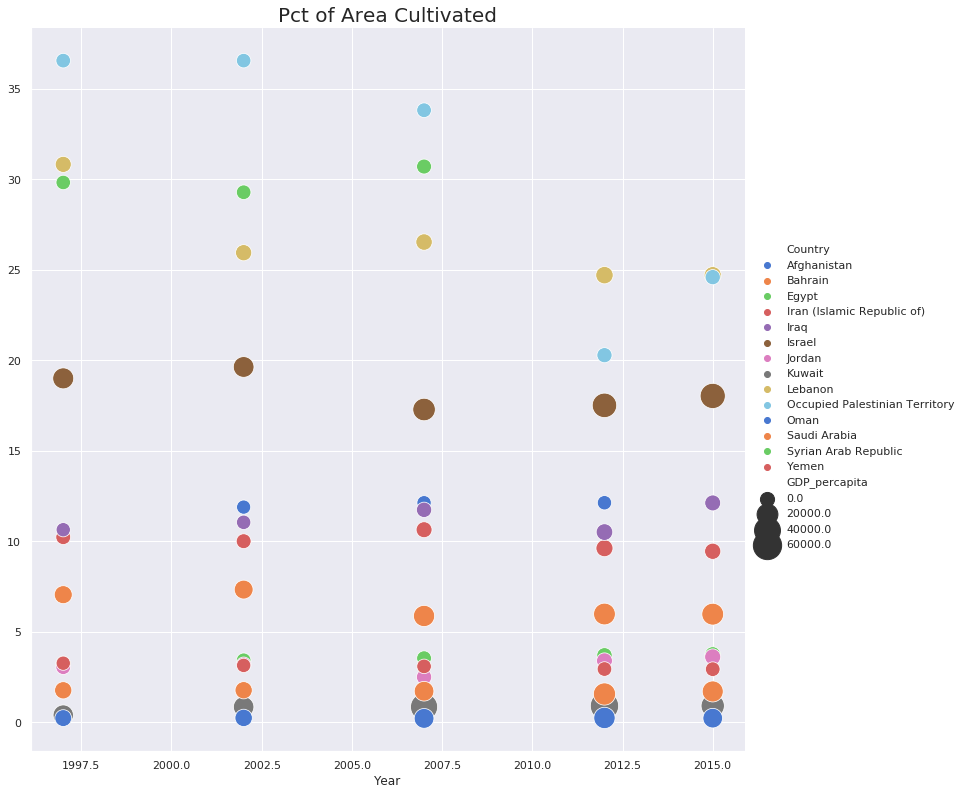

In [107]:
ax=sns.relplot(x='Year', y='Water_access',
               size='GDP_percapita',
               hue='Country',
               sizes=(200, 800),
               height=11, aspect=1,
               palette="muted",
               #x_order=budget["detail"].tolist())
               data=df);
axes = ax.axes.flatten()
axes[0].set_title("Pct of Population with Access to Clean Water",fontsize=20);
axes[0].set_ylabel("");


ax=sns.relplot(x='Year', y='Pct_cultivated',
               size='GDP_percapita',
               hue='Country',
               sizes=(200,800),
               palette="muted",
               height=11, aspect=1,
               data=df);
axes = ax.axes.flatten()
axes[0].set_title("Pct of Area Cultivated",fontsize=20);
axes[0].set_ylabel("");



## Next Steps

###6.  Finish write-up (include visualizations)
###7.  Publish to Github Pages










##  Unused Plots

####Seaborn

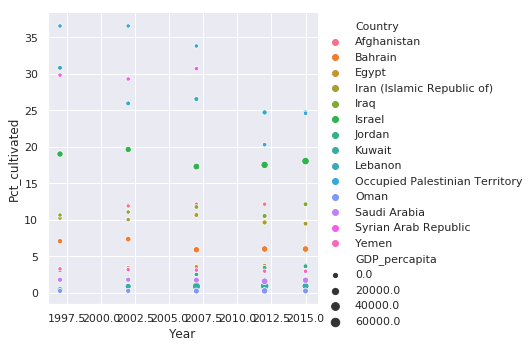

In [47]:
sns.relplot(x='Year', y='Pct_cultivated', hue='Country', size='GDP_percapita', data=df);

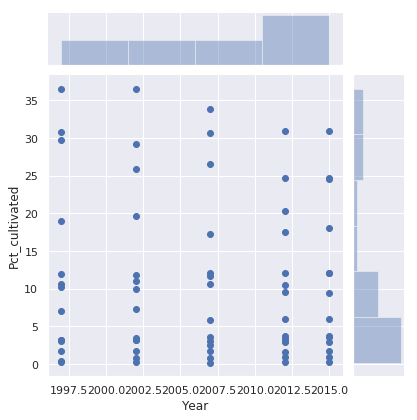

In [48]:
sns.jointplot(x='Year', y='Pct_cultivated', data=df);

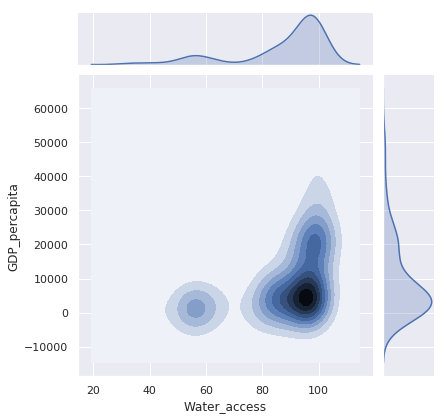

In [49]:
sns.jointplot(x='Water_access', y='GDP_percapita', data=df, kind='kde');

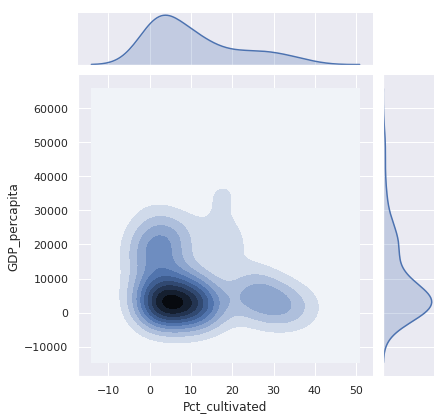

In [50]:
sns.jointplot(x='Pct_cultivated', y='GDP_percapita', data=df, kind='kde');

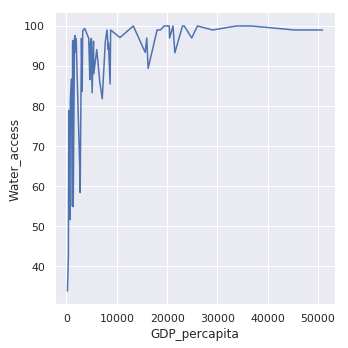

In [46]:
sns.relplot(x='GDP_percapita', y='Water_access', data=df, kind='line', ci=80.0);
#plt.figure(figsize=(16, 9))  # change the size of the graph


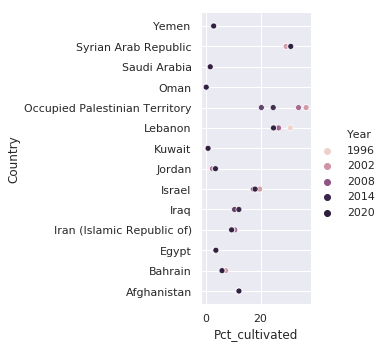

In [45]:
plt.figure(figsize=(20, 9))  # change the size of the graph
ax3 = sns.relplot('Pct_cultivated','Country', hue='Year', data=df, alpha=0.9);


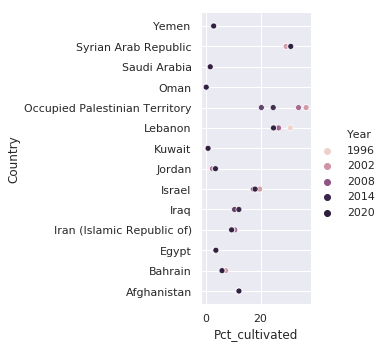

In [44]:
import seaborn as sns
#sns.relplot('Country','Pct_cultivated', hue='Year', data=df, alpha=0.9)
#sns.relplot('Water_access','Country', hue='Year',data=df, alpha=0.9);

ax = sns.relplot('Pct_cultivated','Country', hue='Year', data=df, alpha=0.9)
plt.figure(figsize=(16, 9))  # change the size of the graph


####Plotly

In [51]:
# import from plotly
from plotly.offline import init_notebook_mode, iplot

# configure the browser with necessary javascript libs
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
  init_notebook_mode(connected=False) 

# call this in each offline plotting cell:
configure_plotly_browser_state()

In [52]:
#call it in each offline plotting cell:
configure_plotly_browser_state()

import plotly.plotly as py
import numpy as np
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter

#x = np.random.randn(2000)
#y = np.random.randn(2000)

iplot([Histogram2dContour(x=df['Year'], y=df['Water_access'], contours=Contours(coloring='heatmap')),
       Scatter(x=df['Year'], y=df['Water_access'], mode='markers', marker=Marker(color='white', size=3, opacity=1.3))],
       show_link=False)

In [53]:
iplot([Histogram2dContour(x=df['Year'], y=df['GDP_percapita'], contours=Contours(coloring='heatmap')),
       Scatter(x=df['Year'], y=df['GDP_percapita'], mode='markers', marker=Marker(color='white', size=3, opacity=1.3))],
       show_link=False)

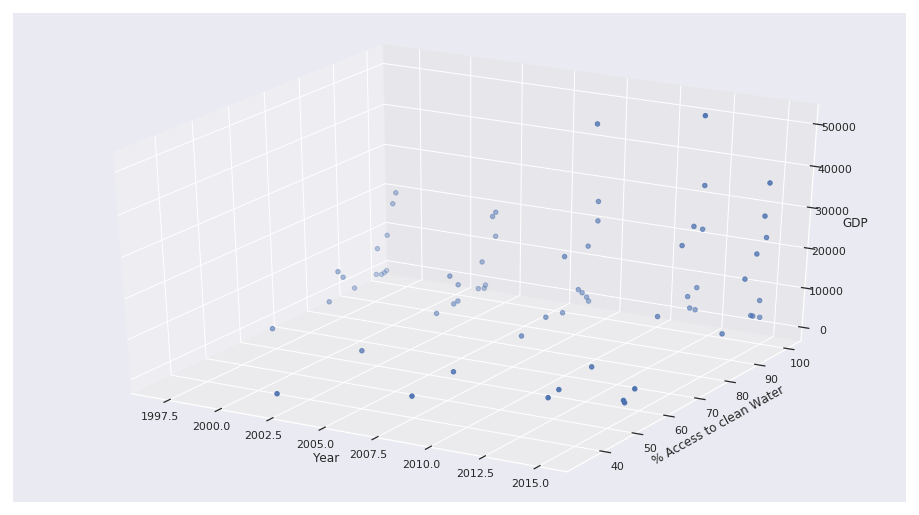

In [54]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Year, df.Water_access, df.GDP_percapita)

ax.set_xlabel('Year')
ax.set_ylabel('% Access to clean Water')
ax.set_zlabel('GDP')

plt.show()


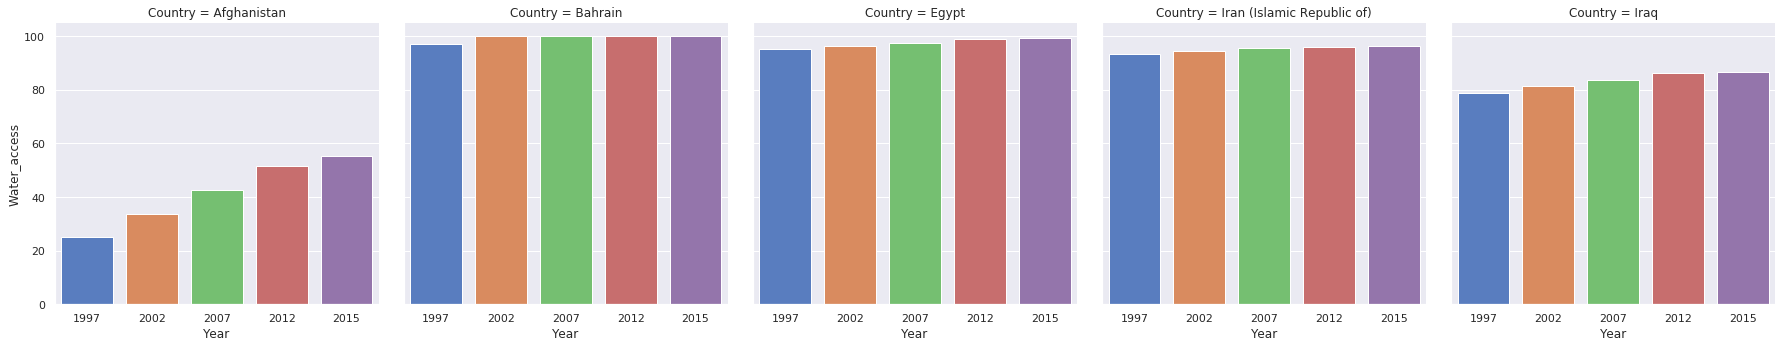

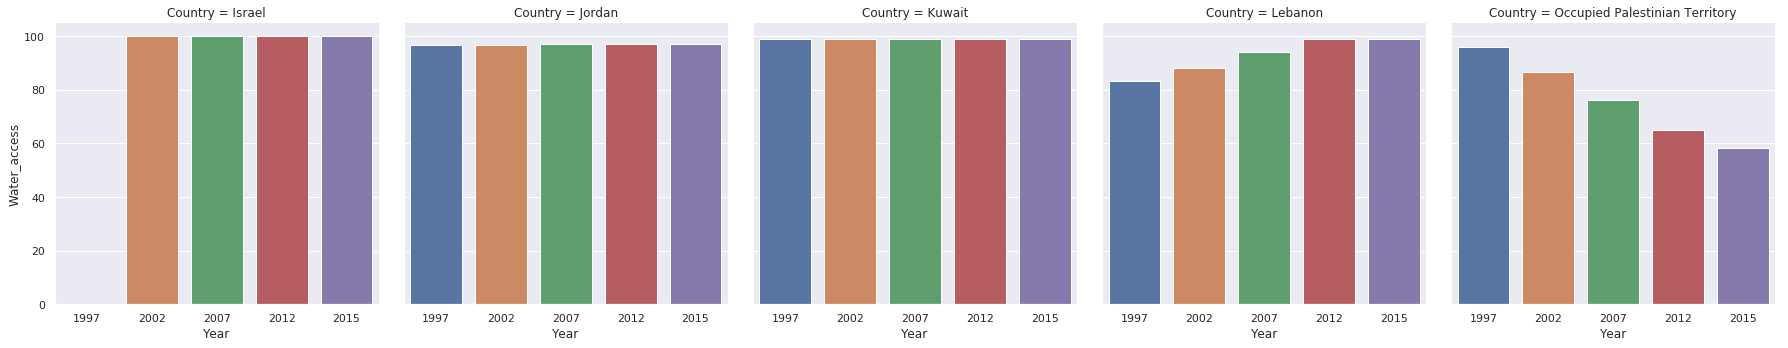

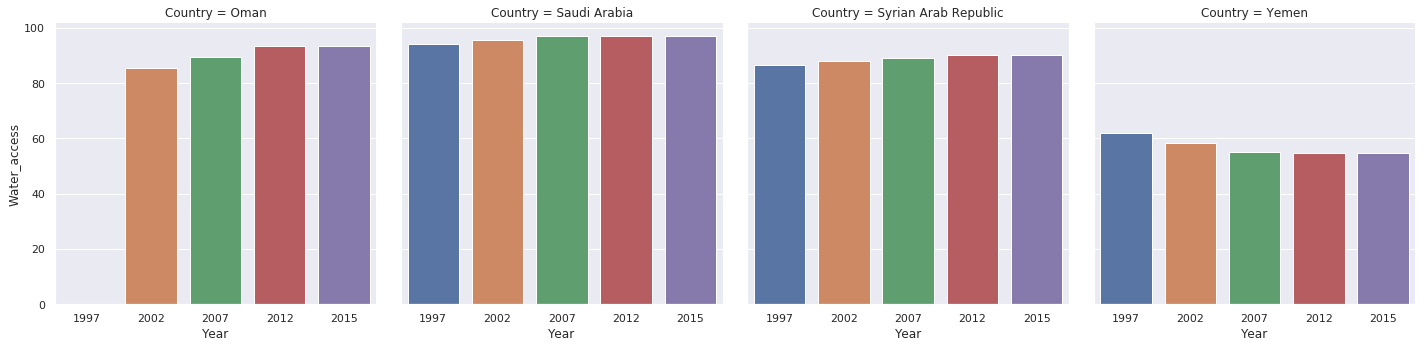

In [55]:
print(sns.catplot(x='Year', y='Water_access', data=df[0:25], col='Country',
                  palette="muted",
                  kind='bar'));
print(sns.catplot(x='Year', y='Water_access', data=df[26:50], col='Country',kind='bar'));
print(sns.catplot(x='Year', y='Water_access', data=df[51:76], col='Country',kind='bar'));
#print(sns.catplot(x='Year', y='Water_access', data=df[66:80], col='Country',kind='bar'));

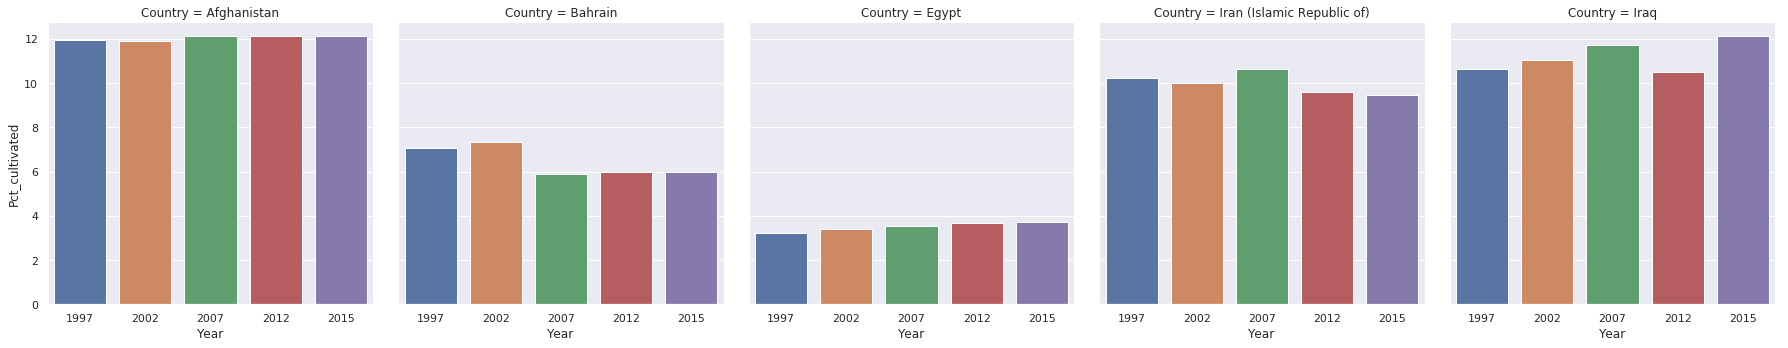

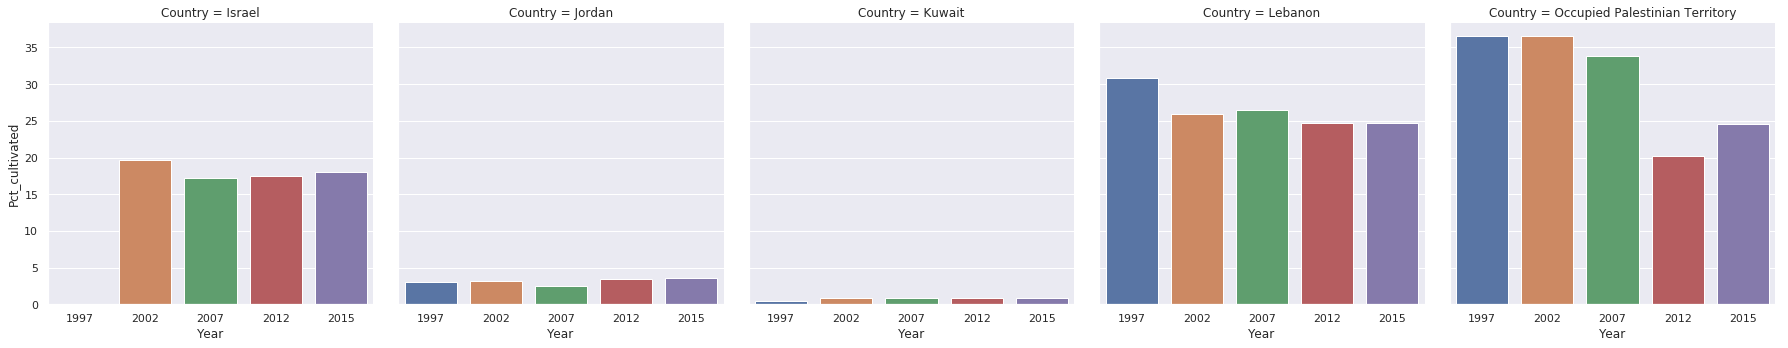

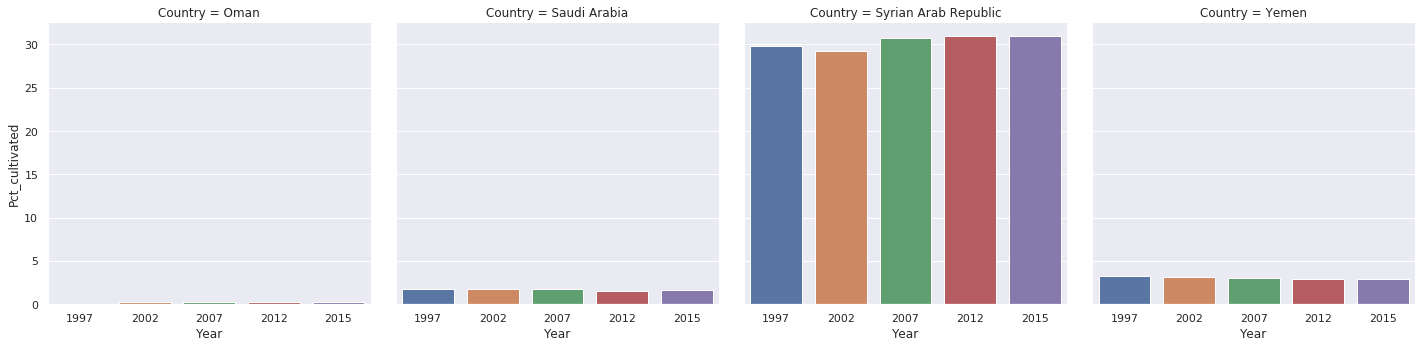

In [56]:
print(sns.catplot(x='Year', y='Pct_cultivated', data=df[0:25], col='Country',kind='bar'))
print(sns.catplot(x='Year', y='Pct_cultivated', data=df[26:50], col='Country',kind='bar'))
print(sns.catplot(x='Year', y='Pct_cultivated', data=df[51:76], col='Country',kind='bar'))


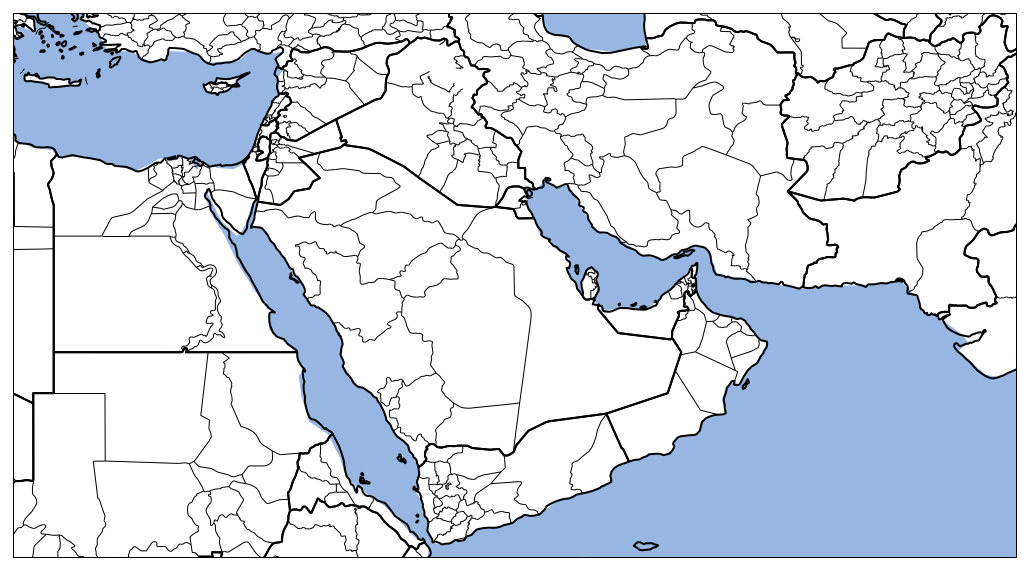

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
#map_extent = [-86.5, -118, 14, 32] # [longitude start, longitude end, latitude start, latitude end]
map_extent = [72, 23, 12, 36] # [longitude start, longitude end, latitude start, latitude end]
ax.set_extent(map_extent)

# Put a background image on for nice sea rendering.
# ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

country_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    facecolor='none')

# ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN);
ax.add_feature(states, edgecolor='black', linewidth=1);
ax.add_feature(country_borders, edgecolor='black', linewidth=2);

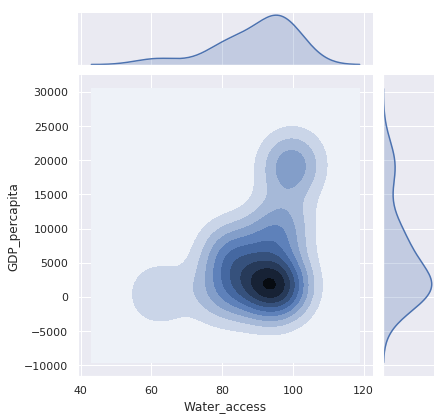

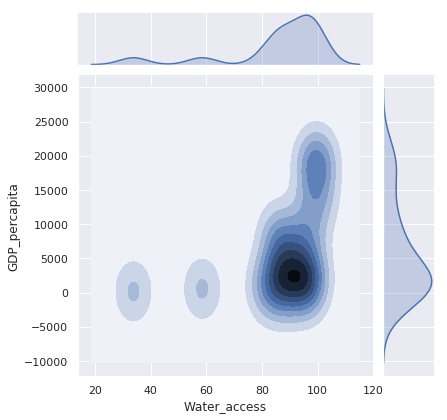

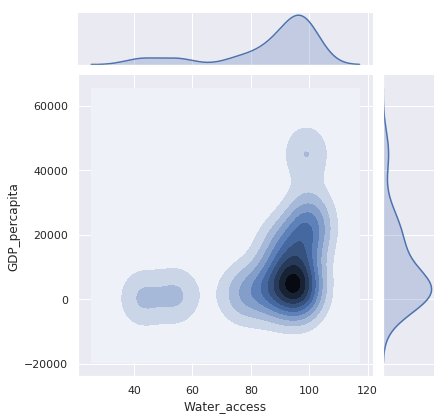

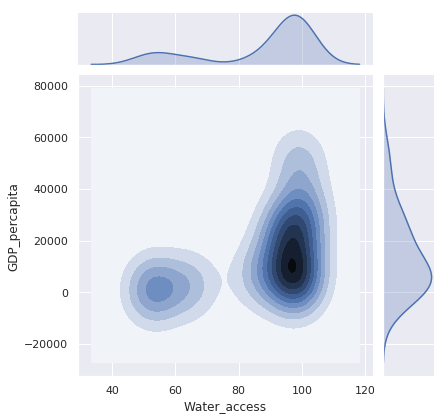

In [58]:
sns.jointplot(x='Water_access', y='GDP_percapita', data=df.query("Year == '1997'"), kind='kde',);
sns.jointplot(x='Water_access', y='GDP_percapita', data=df.query("Year == '2002'"), kind='kde');
sns.jointplot(x='Water_access', y='GDP_percapita', data=df.query("Year == '2007'"), kind='kde');
sns.jointplot(x='Water_access', y='GDP_percapita', data=df.query("Year == '2012'"), kind='kde');

In [0]:
def main():
    print('plotting data...')
    analogPlot = AnalogPlot(200)

    # set up animation
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 200), ylim=(-1000, 8000))
    a0, = ax.plot([], [])
    a1, = ax.plot([], [])
    anim = animation.FuncAnimation(fig, analogPlot.update,
                                   fargs=(a0, a1),
                                   interval=40,
                                   frames=300,
                                   blit=True)

    plt.show()
    # anim.save('animation.mp4', fps=30,
    #           extra_args=['-vcodec', 'libx264'])

    print('exiting.')
